 ### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns

### Loading the dataset

In [2]:
df=pd.read_csv("movies.csv")

In [3]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Necessary featuers required for the recommendation


1. name
2. rating
3. genre 
4. score
5. votes
6. director
7. writer
8. star
9. country
10. company









### Removing unnecessary columns not required for the model

In [4]:
df=df.drop(columns=["year","released","budget","gross","runtime"])

In [5]:
df

,name,rating,genre,score,votes,director,writer,star,country,company
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures
...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,NaN
7664,Dream Round,NaN,Comedy,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,Cactus Blue Entertainment
7665,Saving Mbango,NaN,Drama,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,Embi Productions
7666,It's Just Us,NaN,Drama,NaN,NaN,James Randall,James Randall,Christina Roz,United States,NaN


### Handling Missing values

In [6]:
df.isnull().sum()

name         0
rating      77
genre        0
score        3
votes        3
director     0
writer       3
star         1
country      3
company     17
dtype: int64

#### Visulaizing the rating in a count plot and assigning the missing values with the mode of the rating

[Text(0, 0, 'R'),
 Text(1, 0, 'PG'),
 Text(2, 0, 'G'),
 Text(3, 0, 'Not Rated'),
 Text(4, 0, 'NC-17'),
 Text(5, 0, 'Approved'),
 Text(6, 0, 'TV-PG'),
 Text(7, 0, 'PG-13'),
 Text(8, 0, 'Unrated'),
 Text(9, 0, 'X'),
 Text(10, 0, 'TV-MA'),
 Text(11, 0, 'TV-14')]

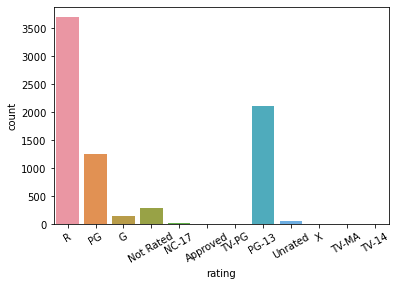

In [7]:
g=sns.countplot(data=df, x="rating")
g.set_xticklabels(g.get_xticklabels(), rotation=30)



In [8]:
df.rating.mode()

0    R
Name: rating, dtype: object

In [9]:
df.rating=df.rating.fillna(df["rating"].mode()[0])

In [10]:
df.isnull().sum()

name         0
rating       0
genre        0
score        3
votes        3
director     0
writer       3
star         1
country      3
company     17
dtype: int64

##### replacing the missing values of score and votes with the mean

In [11]:
df.votes=df.votes.fillna(df["votes"].mean())

In [12]:
df.score=df.score.fillna(df["score"].mean())

#### replacing the misssing values of writer,star,country and company with the mode

In [13]:
df.writer.mode()

0    Woody Allen
Name: writer, dtype: object

In [14]:
df.writer=df.writer.fillna(df["writer"].mode()[0])

In [15]:
df.star.mode()

0    Nicolas Cage
Name: star, dtype: object

In [16]:
df.star=df.star.fillna(df["star"].mode()[0])

In [17]:
df.country.mode()

0    United States
Name: country, dtype: object

In [18]:
df.country=df.country.fillna(df["country"].mode()[0])

In [19]:
df.company.mode()

0    Universal Pictures
Name: company, dtype: object

In [20]:
df.company=df.company.fillna(df["company"].mode()[0])

In [21]:
df.isnull().sum()

name        0
rating      0
genre       0
score       0
votes       0
director    0
writer      0
star        0
country     0
company     0
dtype: int64

In [25]:
df.columns

Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'company'],
      dtype='object')

In [26]:
# Printing column data types in 'df'
column_data_types = df.dtypes

print(column_data_types)

name         object
rating       object
genre        object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
company      object
dtype: object


In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_preprocessed = df.copy()  # Create a copy of the original DataFrame for preprocessing

# Scale numerical features
numerical_features = ['score', 'votes']
scaler = StandardScaler()
df_preprocessed[numerical_features] = scaler.fit_transform(df_preprocessed[numerical_features])

# Encode categorical variables
categorical_features = ['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']
label_encoder = LabelEncoder()
for feature in categorical_features:
    df_preprocessed[feature] = label_encoder.fit_transform(df_preprocessed[feature])

# Check the preprocessed DataFrame
print(df_preprocessed.head())

                                             name  rating  genre     score  \
0                                     The Shining       6      6  2.074759   
1                                 The Blue Lagoon       6      1 -0.609558   
2  Star Wars: Episode V - The Empire Strikes Back       4      0  2.384488   
3                                       Airplane!       4      4  1.352059   
4                                      Caddyshack       6      4  0.939087   

      votes  director  writer  star  country  company  
0  5.137712      2589    4014  1047       54     2319  
1 -0.141526      2269    1632   327       55      731  
2  6.809674      1111    2567  1745       55     1540  
3  0.813881      1301    2000  2246       55     1812  
4  0.121824      1054     521   410       55     1777  


In [29]:
df_preprocessed = df.copy()  # Create a copy of the original DataFrame for preprocessing

# One-hot encode the rating feature
df_preprocessed = pd.concat([df_preprocessed, pd.get_dummies(df_preprocessed['rating'], prefix='is_Rated')], axis=1)

# One-hot encode the genre feature
genres = df_preprocessed['genre'].str.get_dummies(sep=',')
df_preprocessed = pd.concat([df_preprocessed, genres.add_prefix('is_')], axis=1)

# Drop the original rating and genre columns
df_preprocessed.drop(['rating', 'genre'], axis=1, inplace=True)

# Check the preprocessed DataFrame
print(df_preprocessed.head())

                                             name  score      votes  \
0                                     The Shining    8.4   927000.0   
1                                 The Blue Lagoon    5.8    65000.0   
2  Star Wars: Episode V - The Empire Strikes Back    8.7  1200000.0   
3                                       Airplane!    7.7   221000.0   
4                                      Caddyshack    7.3   108000.0   

          director                   writer            star         country  \
0  Stanley Kubrick             Stephen King  Jack Nicholson  United Kingdom   
1   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   United States   
2   Irvin Kershner           Leigh Brackett     Mark Hamill   United States   
3     Jim Abrahams             Jim Abrahams     Robert Hays   United States   
4     Harold Ramis       Brian Doyle-Murray     Chevy Chase   United States   

              company  is_Rated_Approved  is_Rated_G  ...  is_History  \
0        Warner Bros.    

In [30]:
from sklearn.cluster import KMeans

# Select the features for clustering
features_for_clustering = ['score', 'votes', 'is_Rated_R', 'is_Rated_PG', 'is_Rated_PG-13', 'is_Action', 'is_Thriller', 'is_Adventure']

# Instantiate the K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)  # You can specify the desired number of clusters (e.g., 5)

# Fit the algorithm to your data
kmeans.fit(df_preprocessed[features_for_clustering])

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your preprocessed DataFrame
df_preprocessed['cluster_label'] = cluster_labels

# Check the updated DataFrame with cluster labels
print(df_preprocessed.head())


                                             name  score      votes  \
0                                     The Shining    8.4   927000.0   
1                                 The Blue Lagoon    5.8    65000.0   
2  Star Wars: Episode V - The Empire Strikes Back    8.7  1200000.0   
3                                       Airplane!    7.7   221000.0   
4                                      Caddyshack    7.3   108000.0   

          director                   writer            star         country  \
0  Stanley Kubrick             Stephen King  Jack Nicholson  United Kingdom   
1   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   United States   
2   Irvin Kershner           Leigh Brackett     Mark Hamill   United States   
3     Jim Abrahams             Jim Abrahams     Robert Hays   United States   
4     Harold Ramis       Brian Doyle-Murray     Chevy Chase   United States   

              company  is_Rated_Approved  is_Rated_G  ...  is_Horror  \
0        Warner Bros.     